### Libraries

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, precision_score, recall_score


### Import data

In [2]:
data = pd.read_csv("Marketing-Customer-Value-Analysis.csv")

In [3]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### Exploratory Data Analysis (EDA) 

In [4]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

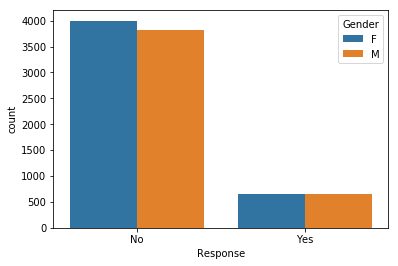

In [5]:
sns.countplot("Response", hue="Gender", data = data)

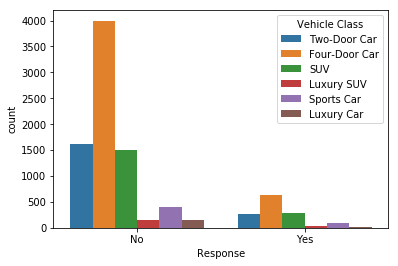

In [6]:
sns.countplot("Response",hue = "Vehicle Class", data = data)

In [7]:
data.Response.value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [8]:
print("Only",round((len(data[(data.Response == "Yes")])/len(data.Response)*100),2),"%","of our customer accept an offer made by our Sales Team.")

Only 14.32 % of our customer accept an offer made by our Sales Team.


In [9]:
data.groupby("Sales Channel").agg({"Response":"count"})

,Response
Sales Channel,
Agent,3477
Branch,2567
Call Center,1765
Web,1325


In [10]:
len(data[(data["Sales Channel"] =="Agent") &
        (data["Response"] == "Yes")])/3477

0.1915444348576359

In [11]:
len(data[(data["Sales Channel"] =="Web") &
        (data["Response"] == "Yes")])/1325

0.11773584905660377

In [12]:
len(data[(data["Sales Channel"] =="Branch") &
        (data["Response"] == "Yes")])/2567

0.11453058044409817

In [13]:
len(data[(data["Sales Channel"] =="Call Center") &
        (data["Response"] == "Yes")])/1765

0.10878186968838527

In [14]:
data["Effective To Date"] = pd.to_datetime(data["Effective To Date"])
print("start:",data["Effective To Date"].min(),"\nends:",data["Effective To Date"].max())

start: 2011-01-01 00:00:00 
ends: 2011-02-28 00:00:00


The data is inbalanced regarding the outcome "Response"

In [15]:
#the data has little correlation
data.corr()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


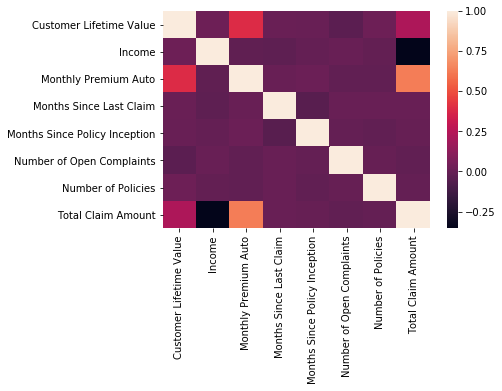

In [16]:
sns.heatmap(data.corr())

In [17]:
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [18]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [19]:
data.Coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [20]:
data.Education.value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [21]:
data.EmploymentStatus.value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [22]:
data.Gender.value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [23]:
data.dtypes

Customer                                 object
State                                    object
Customer Lifetime Value                 float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                   object
Renew Offer Type                         object
Sales Channel                           

In [24]:
data["Location Code"].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [25]:
data["Marital Status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [26]:
data["Policy Type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [27]:
data.Policy.value_counts() # to drop

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [28]:
data["Renew Offer Type"].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [29]:
data["Sales Channel"].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [30]:
data["Vehicle Class"].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [31]:
data["Vehicle Size"].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [32]:
data.State.value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

#### Results 

All categorial features are well distributet, so I will keep them and encode them to numerical data (see Data Analysis)

Some columns don´t make sense or are not so important, e.g. Customer (because it´s just a unique number), Policy is the same as Policy Type, Effective To Date is also not important, I will drop them.

The data is inbalanced regarding the outcome "Response"

### Data Analysis 

The data has a lot of features and the target is the Response. Response based on the offer they were given by the company.
There are a lot of categorial features in the dataset. The next step will be to encode them to integers.
Regarding the unbalanced target, I have to downsample.


In [33]:
data = data.drop(columns={"Customer","Policy", "Effective To Date"})

In [34]:
# Define a list with all features which are categorial

data_categorial = data.select_dtypes(include=["object"])
categories = list(data_categorial.columns)
categories

['State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [35]:
# Encode the categorial Data to numerical

lb = LabelEncoder()

for i in categories:
    data[i] = lb.fit_transform(data[i])


In [36]:
data.groupby("Renew Offer Type").agg({"Response":"sum"})

,Response
Renew Offer Type,
0,594
1,684
2,30
3,0


In [37]:
data.groupby("Sales Channel").agg({"Response":"sum"})

,Response
Sales Channel,
0,666
1,294
2,192
3,156


In [38]:
data.corr()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
State,1.000000,0.008778,-0.002473,0.002047,0.015755,0.000368,-0.004933,0.004620,-0.005240,0.020371,...,0.002126,0.013965,-0.000021,-0.013866,0.008638,-0.007194,-0.003080,0.005495,0.011407,0.006846
Customer Lifetime Value,0.008778,1.000000,-0.008930,0.168040,0.026038,-0.034846,-0.013610,0.024366,0.004854,-0.026003,...,0.011517,0.009418,-0.036343,0.021955,0.020011,-0.068548,-0.003941,0.226451,0.082307,0.017098
Response,-0.002473,-0.008930,1.000000,0.000642,0.000285,-0.016703,0.004396,0.011932,0.001729,-0.094843,...,-0.016597,0.002952,-0.009881,-0.020891,0.001110,-0.162882,-0.086607,0.016877,0.021225,-0.050691
Coverage,0.002047,0.168040,0.000642,1.000000,0.021573,0.003239,-0.014448,-0.010646,-0.020176,0.002956,...,0.016925,0.010658,-0.007971,-0.013515,0.001469,-0.049092,-0.024638,0.279078,-0.017682,-0.003775
Education,0.015755,0.026038,0.000285,0.021573,1.000000,-0.025271,0.002206,0.018709,-0.011533,0.005675,...,0.003021,0.004140,-0.023270,0.007266,0.011650,0.067838,-0.005018,0.020730,0.010192,-0.005491
EmploymentStatus,0.000368,-0.034846,-0.016703,0.003239,-0.025271,1.000000,0.034960,-0.726741,0.015921,0.311563,...,0.008197,0.015376,0.007045,0.005035,-0.002240,-0.121378,-0.018346,0.330465,-0.002443,-0.011253
Gender,-0.004933,-0.013610,0.004396,-0.014448,0.002206,0.034960,1.000000,-0.015138,0.003108,0.034027,...,0.025522,0.004198,-0.003012,0.016258,-0.002227,0.045276,-0.020614,0.074564,0.020043,-0.000347
Income,0.004620,0.024366,0.011932,-0.010646,0.018709,-0.726741,-0.015138,1.000000,-0.027517,-0.231673,...,-0.026715,-0.000875,0.006408,-0.008656,0.002080,0.139856,0.013494,-0.355254,0.004343,0.007945
Location Code,-0.005240,0.004854,0.001729,-0.020176,-0.011533,0.015921,0.003108,-0.027517,1.000000,0.016452,...,-0.016733,0.007030,-0.002697,0.003066,0.015096,-0.023625,-0.003953,0.254766,0.001870,0.021230
Marital Status,0.020371,-0.026003,-0.094843,0.002956,0.005675,0.311563,0.034027,-0.231673,0.016452,1.000000,...,0.007757,-0.029345,-0.000011,0.011664,0.013052,-0.025818,-0.017967,0.204675,0.017597,0.017493


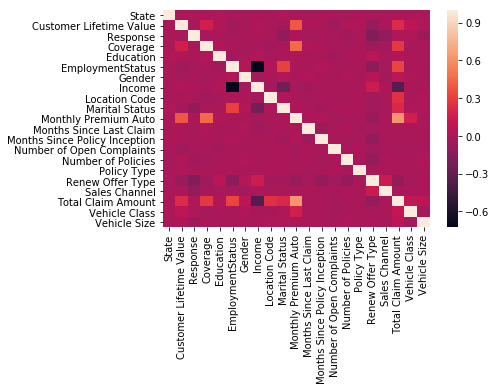

In [39]:
sns.heatmap(data.corr())

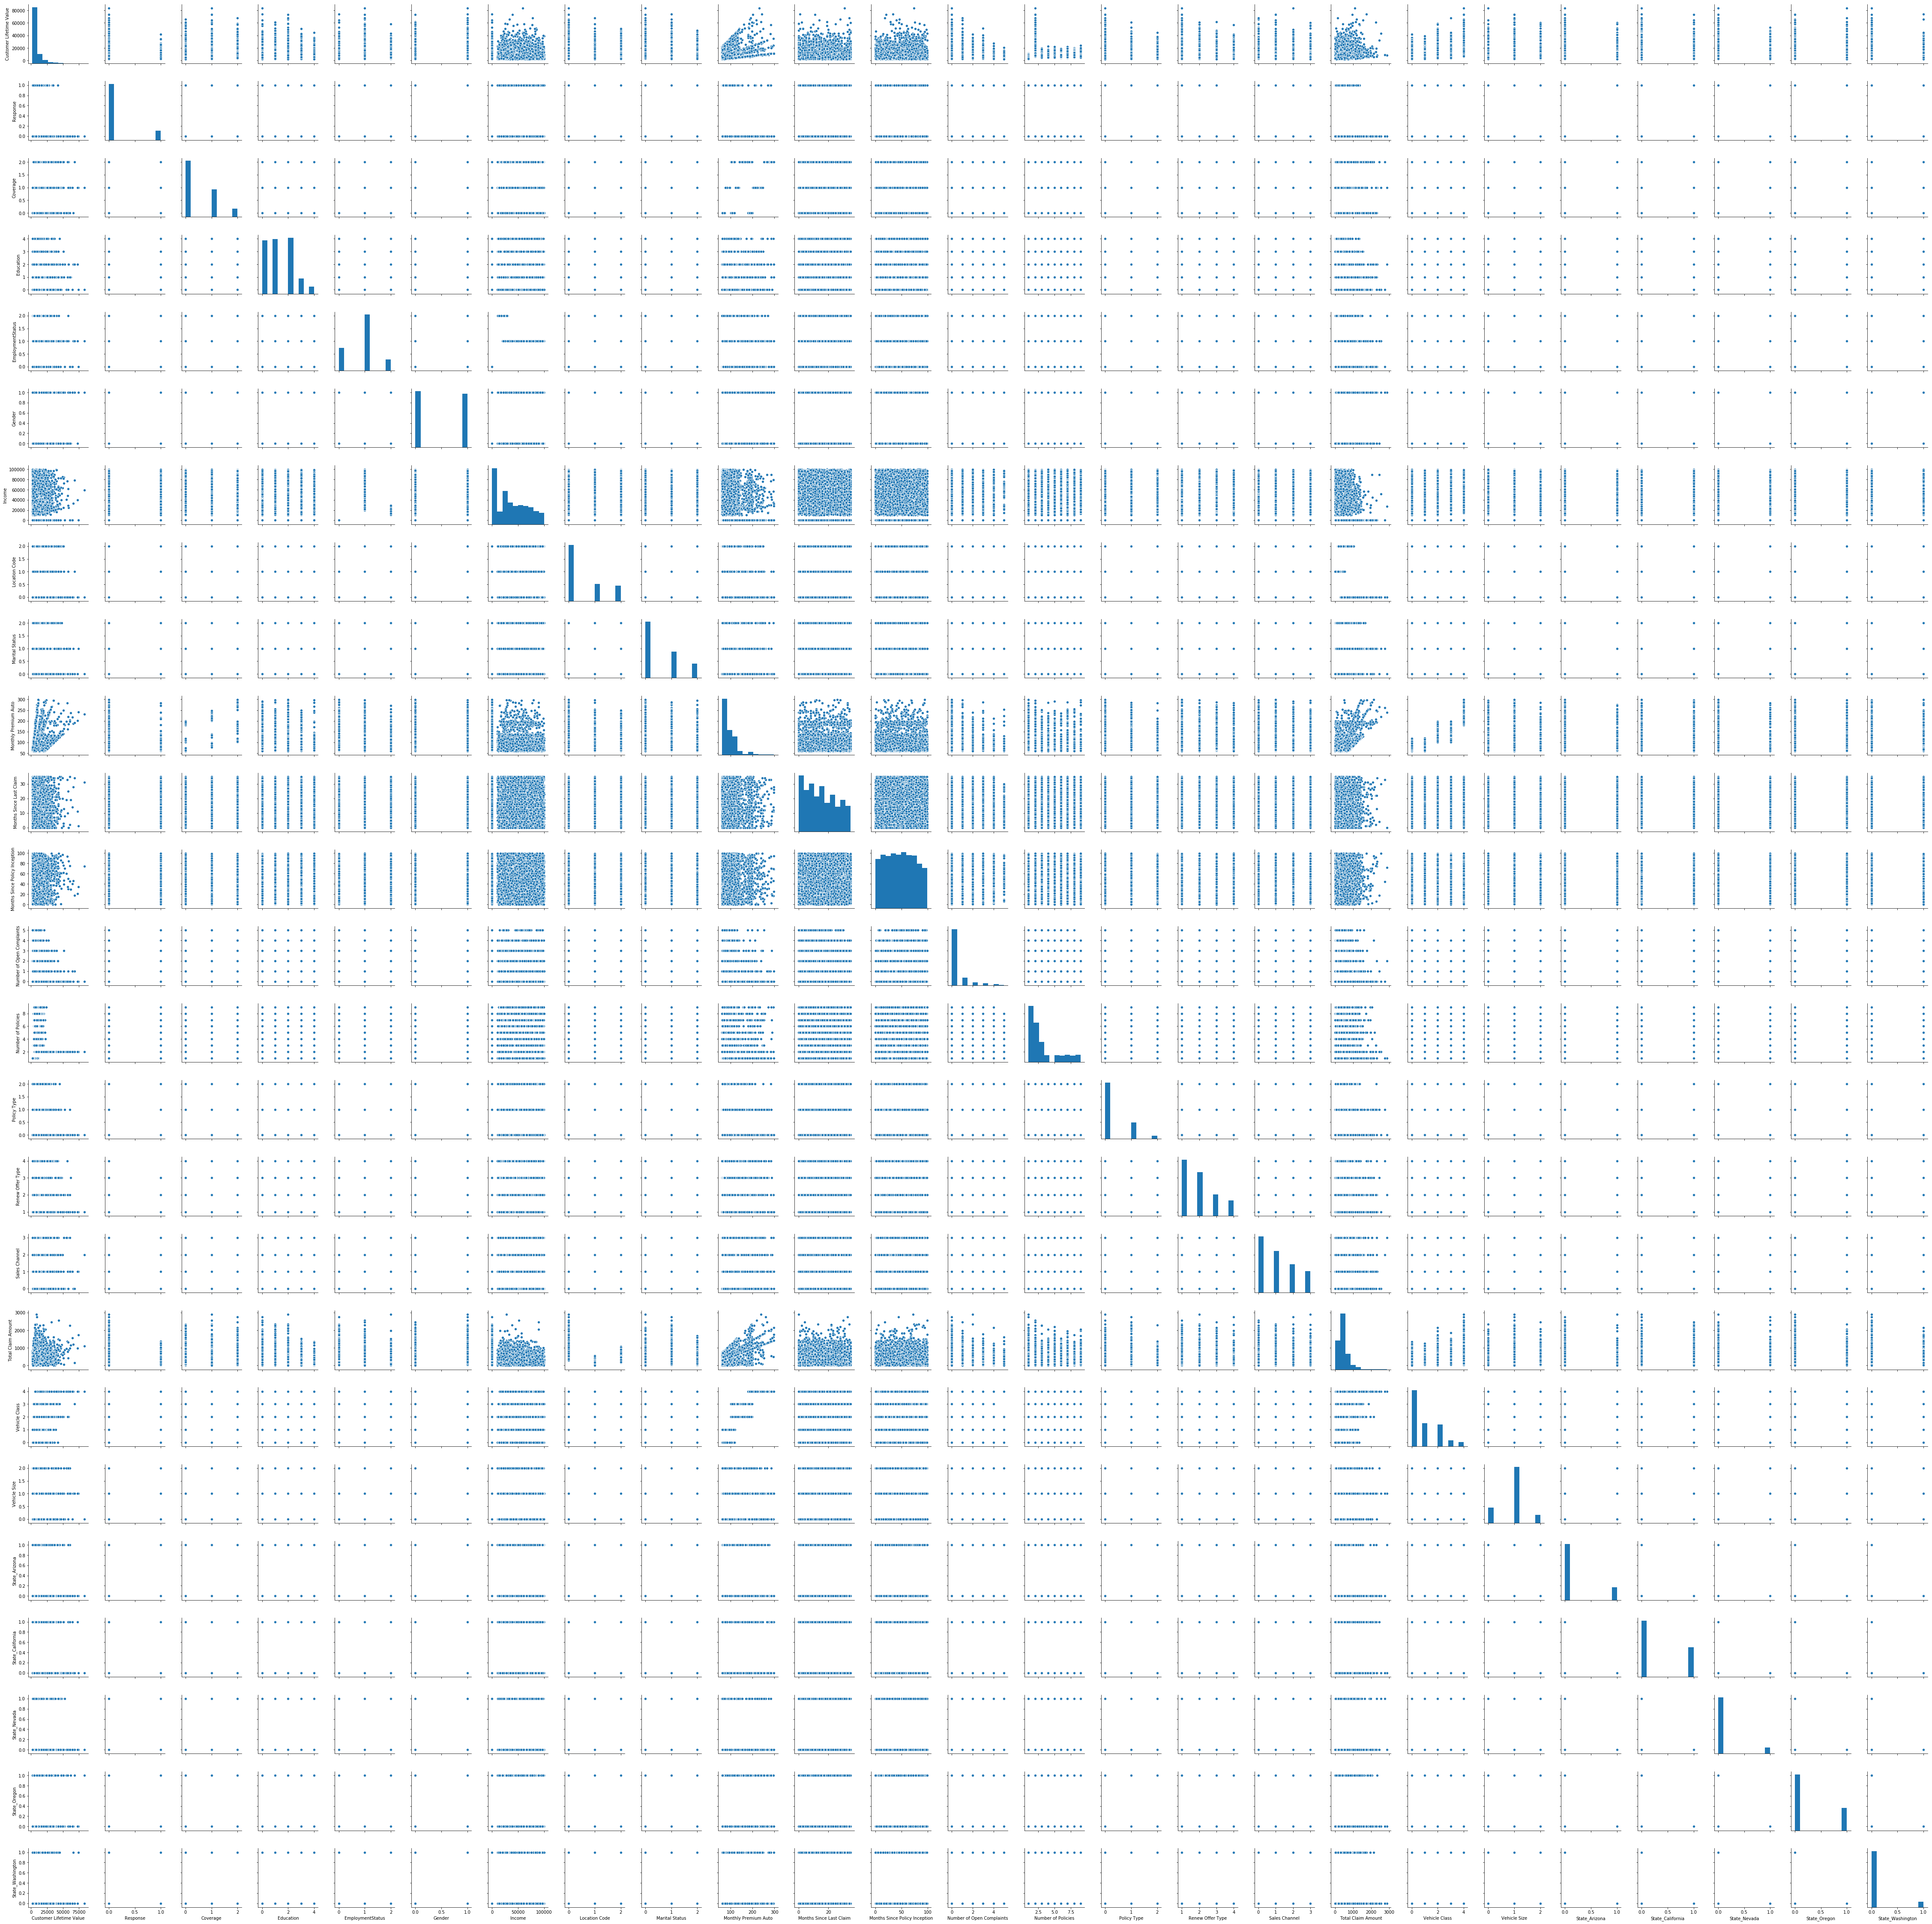

In [88]:
#sns.pairplot(data_dummies)

#### Supervised Machine Learning with imbalanced data

In [40]:
y = data["Response"]

In [41]:
X = data.drop(["Response"], axis=1)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [43]:

lr = LogisticRegression()
# initialize the model (=lr)

lr.fit(X_train,y_train)
#fit the model to the train set

acc = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Logistic Regression Test Accuracy", round(acc, 2),"%")

Logistic Regression Test Accuracy 84.95 %


C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)

y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100
print("2 neighbors KNN Score: ",round(acc,2),"%")

2 neighbors KNN Score:  96.93 %


In [45]:
x_plot = list(range(len(y_test)))

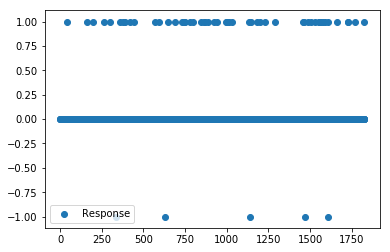

In [46]:
plt.scatter(x_plot, y_pred-y_test) # model failed at y = 1,-1
#plt.scatter(x_plot, y_test, label = "test", alpha = 0.5)
plt.legend()
plt.show()

In [47]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
print("SVM Algorithm Test Accuracy", round(acc, 2),"%")

C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Algorithm Test Accuracy 99.78 %


In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train, y_train,cv = 5)
print('Cross validation train_score',cross_val_score_svc['train_score'].mean())
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1552    4]
 [   0  271]]
accuracy_score: 0.9978106185002736
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1556
           1       0.99      1.00      0.99       271

   micro avg       1.00      1.00      1.00      1827
   macro avg       0.99      1.00      1.00      1827
weighted avg       1.00      1.00      1.00      1827



C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\

Cross validation train_score 1.0
Cross validation test_score 0.9948004235785529


C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


#### Results

The Models have a really high Accuracy more than 99%, this is because the data is imbalanced. The Response with "No" has a percentage of 86%, so the models are not useful and don´t give the accurate view of the data.

### Supervised Learning with balanced Data

In [390]:
y = data.Response

In [391]:
X = data.drop(["Response"], axis = 1)

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=14)

##### Downsampling

In [393]:
#Downsampling:

#1. Test-Train Split!!
# concatenate our training data back together

X_down = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes

no_effect = X_down[X_down.Response==0]
effect = X_down[X_down.Response==1]

# downsample majority

no_effect_downsampled = resample(no_effect,
                               replace = False, # sample without replacement
                               n_samples = len(effect), # match minority n
                               random_state = 27) # reproducible results

# combine minority and downsampled majority

downsampled = pd.concat([no_effect_downsampled, effect])

# checking counts

downsampled.Response.value_counts()

1    1031
0    1031
Name: Response, dtype: int64

In [394]:
downsampled.shape

(2062, 21)

In [395]:
downsampled.head()

,State,Customer Lifetime Value,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Response
4734,3,7255.577594,1,2,1,0,39786,2,1,91,...,91,1,9,1,0,3,365.835977,0,1,0
687,0,6997.827397,1,1,1,0,56940,1,1,87,...,10,0,9,1,1,3,512.662450,0,2,0
2502,0,4506.577736,0,0,0,0,14985,1,1,116,...,45,0,1,1,0,2,571.319514,4,1,0
9079,1,5714.562292,0,0,1,0,74905,0,2,72,...,35,0,3,1,0,2,167.028453,0,1,0
2240,3,4881.753428,1,1,4,0,0,1,2,135,...,86,0,1,1,1,0,648.000000,3,1,0


In [396]:
y_train_down = downsampled.Response

In [397]:
X_train_down = downsampled.drop(["Response"], axis = 1)

#### K-NEAREST NEIGHBOUR

In [398]:
n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = n_neighbors)  # n_neighbors means k
knn.fit(X_train_down, y_train_down)

y_pred = knn.predict(X_test)

acc = knn.score(X_test, y_test)*100

print("Prediction:", y_pred[:5])
print(n_neighbors,"neighbors KNN Score: ",round(acc,2),"%")

Prediction: [0 0 0 0 1]
2 neighbors KNN Score:  86.64 %


In [399]:
acc_train = knn.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = knn.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")
#acc = lr.score(y_test,y_pred)*100
# alpha hypertuning


The accuracy score for the training data is:  87.86 %
The accuracy score for the test data is:  86.64 %


In [400]:
cv_results = cross_val_score(knn, X_train_down,y_train_down, cv = 5)
cv_results

array([0.88164251, 0.83495146, 0.87864078, 0.88106796, 0.87378641])

#### LOGISTIC REGRESSION

In [401]:
lr = LogisticRegression()
# initialize the model (=lr)

lr.fit(X_train_down,y_train_down)
#fit the model to the train set

y_pred = lr.predict(X_test)

acc = lr.score(X_test,y_test)*100
# comapring the test with the data

print("Prediction",y_pred[:5])
print("Logistic Regression Test Accuracy", round(acc, 2),"%")

Prediction [1 1 1 1 0]
Logistic Regression Test Accuracy 58.4 %


C:\Users\linda\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### DECISION TREE

In [402]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_down, y_train_down)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = dtc.score(X_test, y_test)*100

print("Prediction", y_pred_dtc[:5])
print("Decision Tree Test Accuracy", round(acc_dtc, 2),"%")

Prediction [0 1 0 0 1]
Decision Tree Test Accuracy 88.67 %


In [403]:
acc_train = dtc.score(X_train, y_train)*100
print("The accuracy score for the training data is: ",round(acc_train,2),"%")
acc_test = dtc.score(X_test,y_test)*100
print("The accuracy score for the test data is: ",round(acc_test,2),"%")
#acc = lr.score(y_test,y_pred)*100
# alpha hypertuning


The accuracy score for the training data is:  90.45 %
The accuracy score for the test data is:  88.67 %


In [404]:
cv_results = cross_val_score(dtc, X_train_down,y_train_down, cv = 5)
cv_results

array([0.91545894, 0.90776699, 0.88834951, 0.91504854, 0.92718447])

In [405]:
cnf_matrix = confusion_matrix(y_test, y_pred_dtc)
cnf_matrix

array([[1349,  201],
       [   6,  271]], dtype=int64)

In [406]:
dtc_recall = recall_score(y_test, y_pred_dtc)
dtc_recall

0.9783393501805054

In [407]:
dtc_precision = precision_score(y_test,y_pred_dtc)
dtc_precision

0.5741525423728814